In [255]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt

In [212]:
counts = pd.Series([632, 1638, 569, 115])
counts

,0
0,632
1,1638
2,569
3,115


In [213]:
counts.values

array([ 632, 1638,  569,  115])

In [214]:
counts.index

RangeIndex(start=0, stop=4, step=1)

In [215]:
bacteria = pd.Series([632, 1638, 569, 115], index=['Firmicutes', 'Protebacteria', 'Actinobacteria', 'Bacteroidetes'])
bacteria

,0
Firmicutes,632
Protebacteria,1638
Actinobacteria,569
Bacteroidetes,115


In [216]:
bacteria['Actinobacteria']

569

In [217]:
bacteria[[name.endswith('bacteria') for name in bacteria.index]]

,0
Protebacteria,1638
Actinobacteria,569


In [218]:
[name.endswith('bacteria') for name in bacteria.index]

[False, True, True, False]

In [219]:
bacteria[0]

<ipython-input-219-302a79bfab41>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bacteria[0]


632

In [220]:
bacteria.name = 'counts'
bacteria.index.name = 'phylum'
bacteria

,counts
phylum,
Firmicutes,632
Protebacteria,1638
Actinobacteria,569
Bacteroidetes,115


In [221]:
np.log(bacteria)

,counts
phylum,
Firmicutes,6.448889
Protebacteria,7.401231
Actinobacteria,6.343880
Bacteroidetes,4.744932


In [222]:
bacteria[bacteria>1000]

,counts
phylum,
Protebacteria,1638


In [223]:
bacteria_dict = {'Firmicutes': 632, 'Proteobacteria': 1638, 'Actinobacteria': 569, 'Bacteriodetes': 115}
pd.Series(bacteria_dict)

,0
Firmicutes,632
Proteobacteria,1638
Actinobacteria,569
Bacteriodetes,115


In [224]:
bacteria2 = pd.Series(bacteria_dict, index=['Cyanobacteria', 'Firmicutes', 'Proteobacteria', 'Actinobacteria'])
bacteria2

,0
Cyanobacteria,NaN
Firmicutes,632.0
Proteobacteria,1638.0
Actinobacteria,569.0


In [225]:
bacteria2.isnull()

,0
Cyanobacteria,True
Firmicutes,False
Proteobacteria,False
Actinobacteria,False


In [226]:
data = pd.DataFrame({'value': [632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient': [1, 1, 1, 1, 2, 2, 2,2],
                     'phylum': ['Firmicutes', 'Protebacteria', 'Actinobacteria', 'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
data

,value,patient,phylum
0,632,1,Firmicutes
1,1638,1,Protebacteria
2,569,1,Actinobacteria
3,115,1,Bacteroidetes
4,433,2,Firmicutes
5,1130,2,Proteobacteria
6,754,2,Actinobacteria
7,555,2,Bacteroidetes


In [227]:
data[['phylum', 'value', 'patient']]

,phylum,value,patient
0,Firmicutes,632,1
1,Protebacteria,1638,1
2,Actinobacteria,569,1
3,Bacteroidetes,115,1
4,Firmicutes,433,2
5,Proteobacteria,1130,2
6,Actinobacteria,754,2
7,Bacteroidetes,555,2


In [228]:
data.columns

Index(['value', 'patient', 'phylum'], dtype='object')

In [229]:
vals = data.value
vals

,value
0,632
1,1638
2,569
3,115
4,433
5,1130
6,754
7,555


In [230]:
vals[5] = 0
vals

<ipython-input-230-3ce3eec07de1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vals[5] = 0


,value
0,632
1,1638
2,569
3,115
4,433
5,0
6,754
7,555


In [231]:
data = pd.DataFrame({0: {'patient': 1, 'phylum': 'Firmicutes', 'value': 632},
                     1: {'patient': 1, 'phylum': 'Firmicutes', 'value': 569},
                     2: {'patient': 1, 'phylum': 'Bacteroidetes', 'value': 1638},
                     3: {'patient': 2, 'phylum': 'Firmicutes', 'value': 555},
                     4: {'patient': 2, 'phylum': 'Proteobacteria', 'value': 433},
                     5: {'patient': 2, 'phylum': 'Actinobacteria', 'value': 1130}})
data

,0,1,2,3,4,5
patient,1,1,1,2,2,2
phylum,Firmicutes,Firmicutes,Bacteroidetes,Firmicutes,Proteobacteria,Actinobacteria
value,632,569,1638,555,433,1130


In [232]:
data.T

,patient,phylum,value
0,1,Firmicutes,632
1,1,Firmicutes,569
2,1,Bacteroidetes,1638
3,2,Firmicutes,555
4,2,Proteobacteria,433
5,2,Actinobacteria,1130


In [233]:
data['month'] = ['Jan']*len(data)
data

,0,1,2,3,4,5,month
patient,1,1,1,2,2,2,Jan
phylum,Firmicutes,Firmicutes,Bacteroidetes,Firmicutes,Proteobacteria,Actinobacteria,Jan
value,632,569,1638,555,433,1130,Jan


In [234]:
del data['month']
data

,0,1,2,3,4,5
patient,1,1,1,2,2,2
phylum,Firmicutes,Firmicutes,Bacteroidetes,Firmicutes,Proteobacteria,Actinobacteria
value,632,569,1638,555,433,1130


In [235]:
data.values

array([[1, 1, 1, 2, 2, 2],
       ['Firmicutes', 'Firmicutes', 'Bacteroidetes', 'Firmicutes',
        'Proteobacteria', 'Actinobacteria'],
       [632, 569, 1638, 555, 433, 1130]], dtype=object)

In [236]:
loan = pd.read_csv('train.csv')

In [237]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [238]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [239]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [240]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [241]:
loan.index

RangeIndex(start=0, stop=614, step=1)

In [242]:
loan.head().values

array([['LP001002', 'Male', 'No', '0', 'Graduate', 'No', 5849, 0.0, nan,
        360.0, 1.0, 'Urban', 'Y'],
       ['LP001003', 'Male', 'Yes', '1', 'Graduate', 'No', 4583, 1508.0,
        128.0, 360.0, 1.0, 'Rural', 'N'],
       ['LP001005', 'Male', 'Yes', '0', 'Graduate', 'Yes', 3000, 0.0,
        66.0, 360.0, 1.0, 'Urban', 'Y'],
       ['LP001006', 'Male', 'Yes', '0', 'Not Graduate', 'No', 2583,
        2358.0, 120.0, 360.0, 1.0, 'Urban', 'Y'],
       ['LP001008', 'Male', 'No', '0', 'Graduate', 'No', 6000, 0.0,
        141.0, 360.0, 1.0, 'Urban', 'Y']], dtype=object)

In [243]:
loan.head().T

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


In [244]:
loan.sort_index(axis=0, ascending=False).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y


In [245]:
loan.sort_values(by='Dependents', ascending=True).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
365,LP002181,Male,No,0,Not Graduate,No,6216,0.0,133.0,360.0,1.0,Rural,N
364,LP002180,Male,No,0,Graduate,Yes,6822,0.0,141.0,360.0,1.0,Rural,Y
363,LP002178,Male,Yes,0,Graduate,No,3013,3033.0,95.0,300.0,NaN,Urban,Y
362,LP002175,Male,Yes,0,Graduate,No,4750,2333.0,130.0,360.0,1.0,Urban,Y


In [246]:
loan=loan.set_index('Gender')
loan.head(10)

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,,,,,,,,,,,,
Male,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
Male,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
Male,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
Male,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
Male,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
Male,LP001011,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
Male,LP001013,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
Male,LP001014,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
Male,LP001018,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


In [247]:
loan.iloc[1:8:2,[0,2,4]]

,Loan_ID,Dependents,Self_Employed
Gender,,,
Male,LP001003,1,No
Male,LP001006,0,No
Male,LP001011,2,Yes
Male,LP001014,3+,No


In [248]:
loan[loan.ApplicantIncome>5000].head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,,,,,,,,,,,,
Male,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
Male,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
Male,LP001011,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
Male,LP001020,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
Male,LP001043,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N


In [249]:
loan[['CoapplicantIncome', 'Loan_Amount_Term']].sum()

,0
CoapplicantIncome,995444.919989
Loan_Amount_Term,205200.000000


In [250]:
loan[['CoapplicantIncome', 'Loan_Amount_Term']].mean()

,0
CoapplicantIncome,1621.245798
Loan_Amount_Term,342.000000


In [251]:
loan[['CoapplicantIncome', 'Loan_Amount_Term']].std()

,0
CoapplicantIncome,2926.248369
Loan_Amount_Term,65.120410


In [252]:
loan['anothercolumn'] = [np.random.random() for x in range(len(loan))]
loan.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,anothercolumn
Gender,,,,,,,,,,,,,
Male,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.367502
Male,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.026397
Male,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.147751
Male,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.593199
Male,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.505078


In [254]:
del loan['anothercolumn']

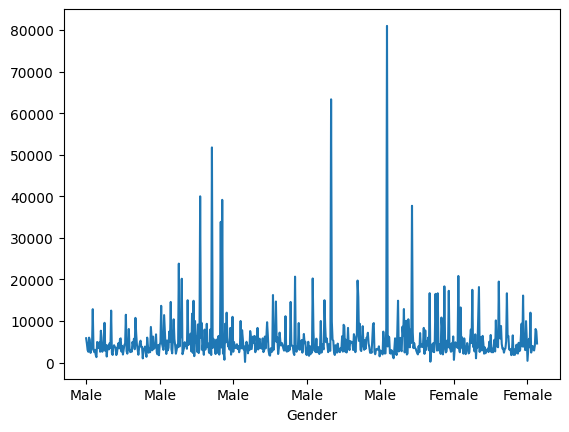

In [256]:
loan['ApplicantIncome'].plot()
plt.show()

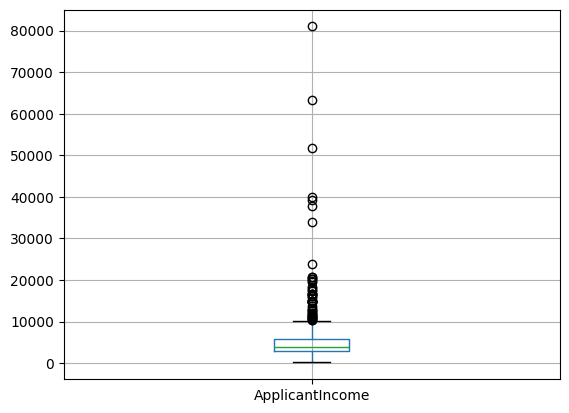

In [257]:
loan.boxplot(column='ApplicantIncome')
plt.show()

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

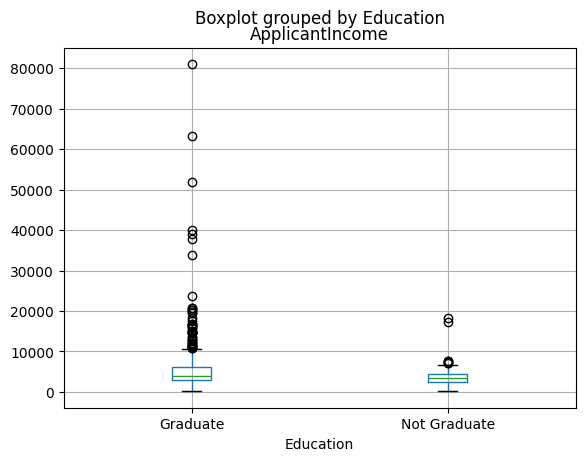

In [258]:
loan.boxplot(column='ApplicantIncome', by='Education')

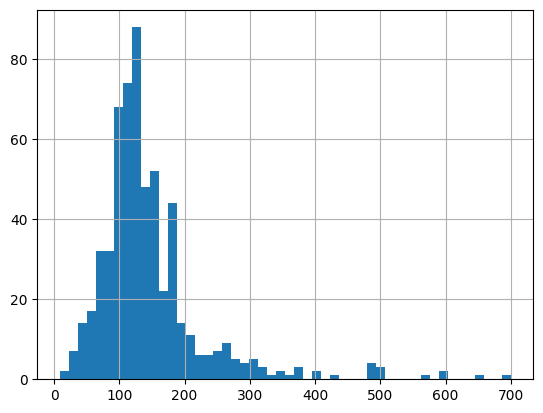

In [259]:
loan['LoanAmount'].hist(bins=50)
plt.show()

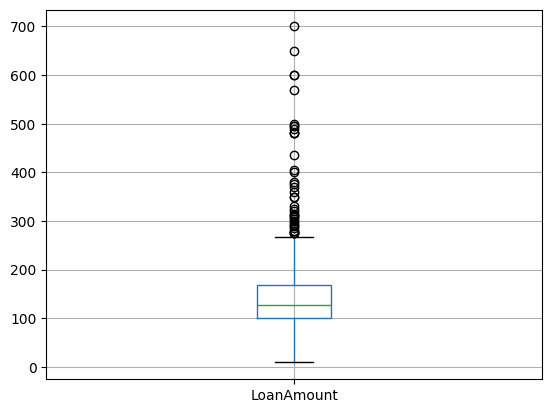

In [260]:
loan.boxplot(column='LoanAmount')
plt.show()